In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_file =r'/content/drive/My Drive/Hackathon/Loan Deliquncy pred/train.csv'
test_file = r'/content/drive/My Drive/Hackathon/Loan Deliquncy pred/test.csv'

In [0]:
import pandas as pd
import numpy as np

In [0]:
data = pd.read_csv(train_file,index_col = 'loan_id')
test = pd.read_csv(test_file,index_col = 'loan_id')

In [79]:
pd.set_option('display.max_columns', 50)
data.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
loan_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [0]:
date_cols = ['origination_date','first_payment_date']
for i in date_cols:
    print(i)
    data[i] = pd.to_datetime(data[i])
    test[i] = pd.to_datetime(test[i])

origination_date
first_payment_date


In [0]:
test.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
loan_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Y,Browning-Hart,3.875,417000,360,2012-01-02,2012-01-04,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,X,OTHER,4.500,113000,360,2012-01-02,2012-01-04,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Y,OTHER,4.500,72000,360,2012-01-01,2012-01-03,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,X,"Miller, Mcclure and Allen",4.125,123000,180,2012-01-02,2012-01-04,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0
5,X,Browning-Hart,3.250,166000,180,2012-01-02,2012-01-04,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data.columns

Index(['source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [0]:
# cols_drop = ['interest_rate','insurance_percent']
# data.drop(cols_drop,inplace=True,axis=1)
# test.drop(cols_drop,inplace=True,axis=1)

In [0]:
data.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
loan_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,2012-05-01,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,2012-03-01,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,2012-03-01,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
601385667462,X,OTHER,4.750,135000,360,2012-02-01,2012-04-01,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
273870029961,X,OTHER,4.750,124000,360,2012-02-01,2012-04-01,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [0]:
data['days_first_payment'] = data['first_payment_date']-data['origination_date']
test['days_first_payment'] = test['first_payment_date']-test['origination_date']
data.drop(['first_payment_date','origination_date'],inplace=True,axis=1)
test.drop(['first_payment_date','origination_date'],inplace=True,axis=1)

In [0]:
data.dtypes

source                               object
financial_institution                object
interest_rate                       float64
unpaid_principal_bal                  int64
loan_term                             int64
loan_to_value                         int64
number_of_borrowers                 float64
debt_to_income_ratio                float64
borrower_credit_score               float64
loan_purpose                         object
insurance_percent                   float64
co-borrower_credit_score            float64
insurance_type                      float64
m1                                    int64
m2                                    int64
m3                                    int64
m4                                    int64
m5                                    int64
m6                                    int64
m7                                    int64
m8                                    int64
m9                                    int64
m10                             

In [0]:
data['days_first_payment'] = pd.to_numeric(data['days_first_payment'].dt.days, downcast='integer')
test['days_first_payment'] = pd.to_numeric(test['days_first_payment'].dt.days, downcast='integer')

In [0]:
data.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,days_first_payment
loan_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,61
672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,60
742515242108,Z,Thornton-Davis,3.250,366000,180,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,60
601385667462,X,OTHER,4.750,135000,360,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,60
273870029961,X,OTHER,4.750,124000,360,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,60


In [0]:
obj_cols = data.select_dtypes('object').columns

In [0]:
def dummies(data,col):
    dummy = pd.get_dummies(data[col])
    data.drop([col],inplace=True,axis=1)
    return pd.concat([data,dummy],axis=1)

In [0]:
for i in obj_cols:
    data = dummies(data,i)
    test = dummies(test,i)

In [0]:
data.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,days_first_payment,X,Y,Z,Anderson-Taylor,Browning-Hart,Chapman-Mcmahon,"Cole, Brooks and Vincent",Edwards-Hoffman,"Martinez, Duffy and Bird","Miller, Mcclure and Allen",Nicholson Group,OTHER,Richards-Walters,Richardson Ltd,"Romero, Woods and Johnson","Sanchez, Hays and Wilkerson",Sanchez-Robinson,Suarez Inc,"Swanson, Newton and Miller","Taylor, Hunt and Rodriguez",Thornton-Davis,"Turner, Baldwin and Rhodes",A23,B12,C86
loan_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
268055008619,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,61,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
672831657627,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,60,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
742515242108,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,60,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
601385667462,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
273870029961,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
x = data.drop(['m13'],axis=1)
y = data['m13'].values.reshape(-1,1)

In [0]:
data.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13', 'days_first_payment', 'X', 'Y', 'Z', 'Anderson-Taylor',
       'Browning-Hart', 'Chapman-Mcmahon', 'Cole, Brooks and Vincent',
       'Edwards-Hoffman', 'Martinez, Duffy and Bird',
       'Miller, Mcclure and Allen', 'Nicholson Group', 'OTHER',
       'Richards-Walters', 'Richardson Ltd', 'Romero, Woods and Johnson',
       'Sanchez, Hays and Wilkerson', 'Sanchez-Robinson', 'Suarez Inc',
       'Swanson, Newton and Miller', 'Taylor, Hunt and Rodriguez',
       'Thornton-Davis', 'Turner, Baldwin and Rhodes', 'A23', 'B12', 'C86'],
      dtype='object')

Text(0.5, 1.0, 'Correlation between features')

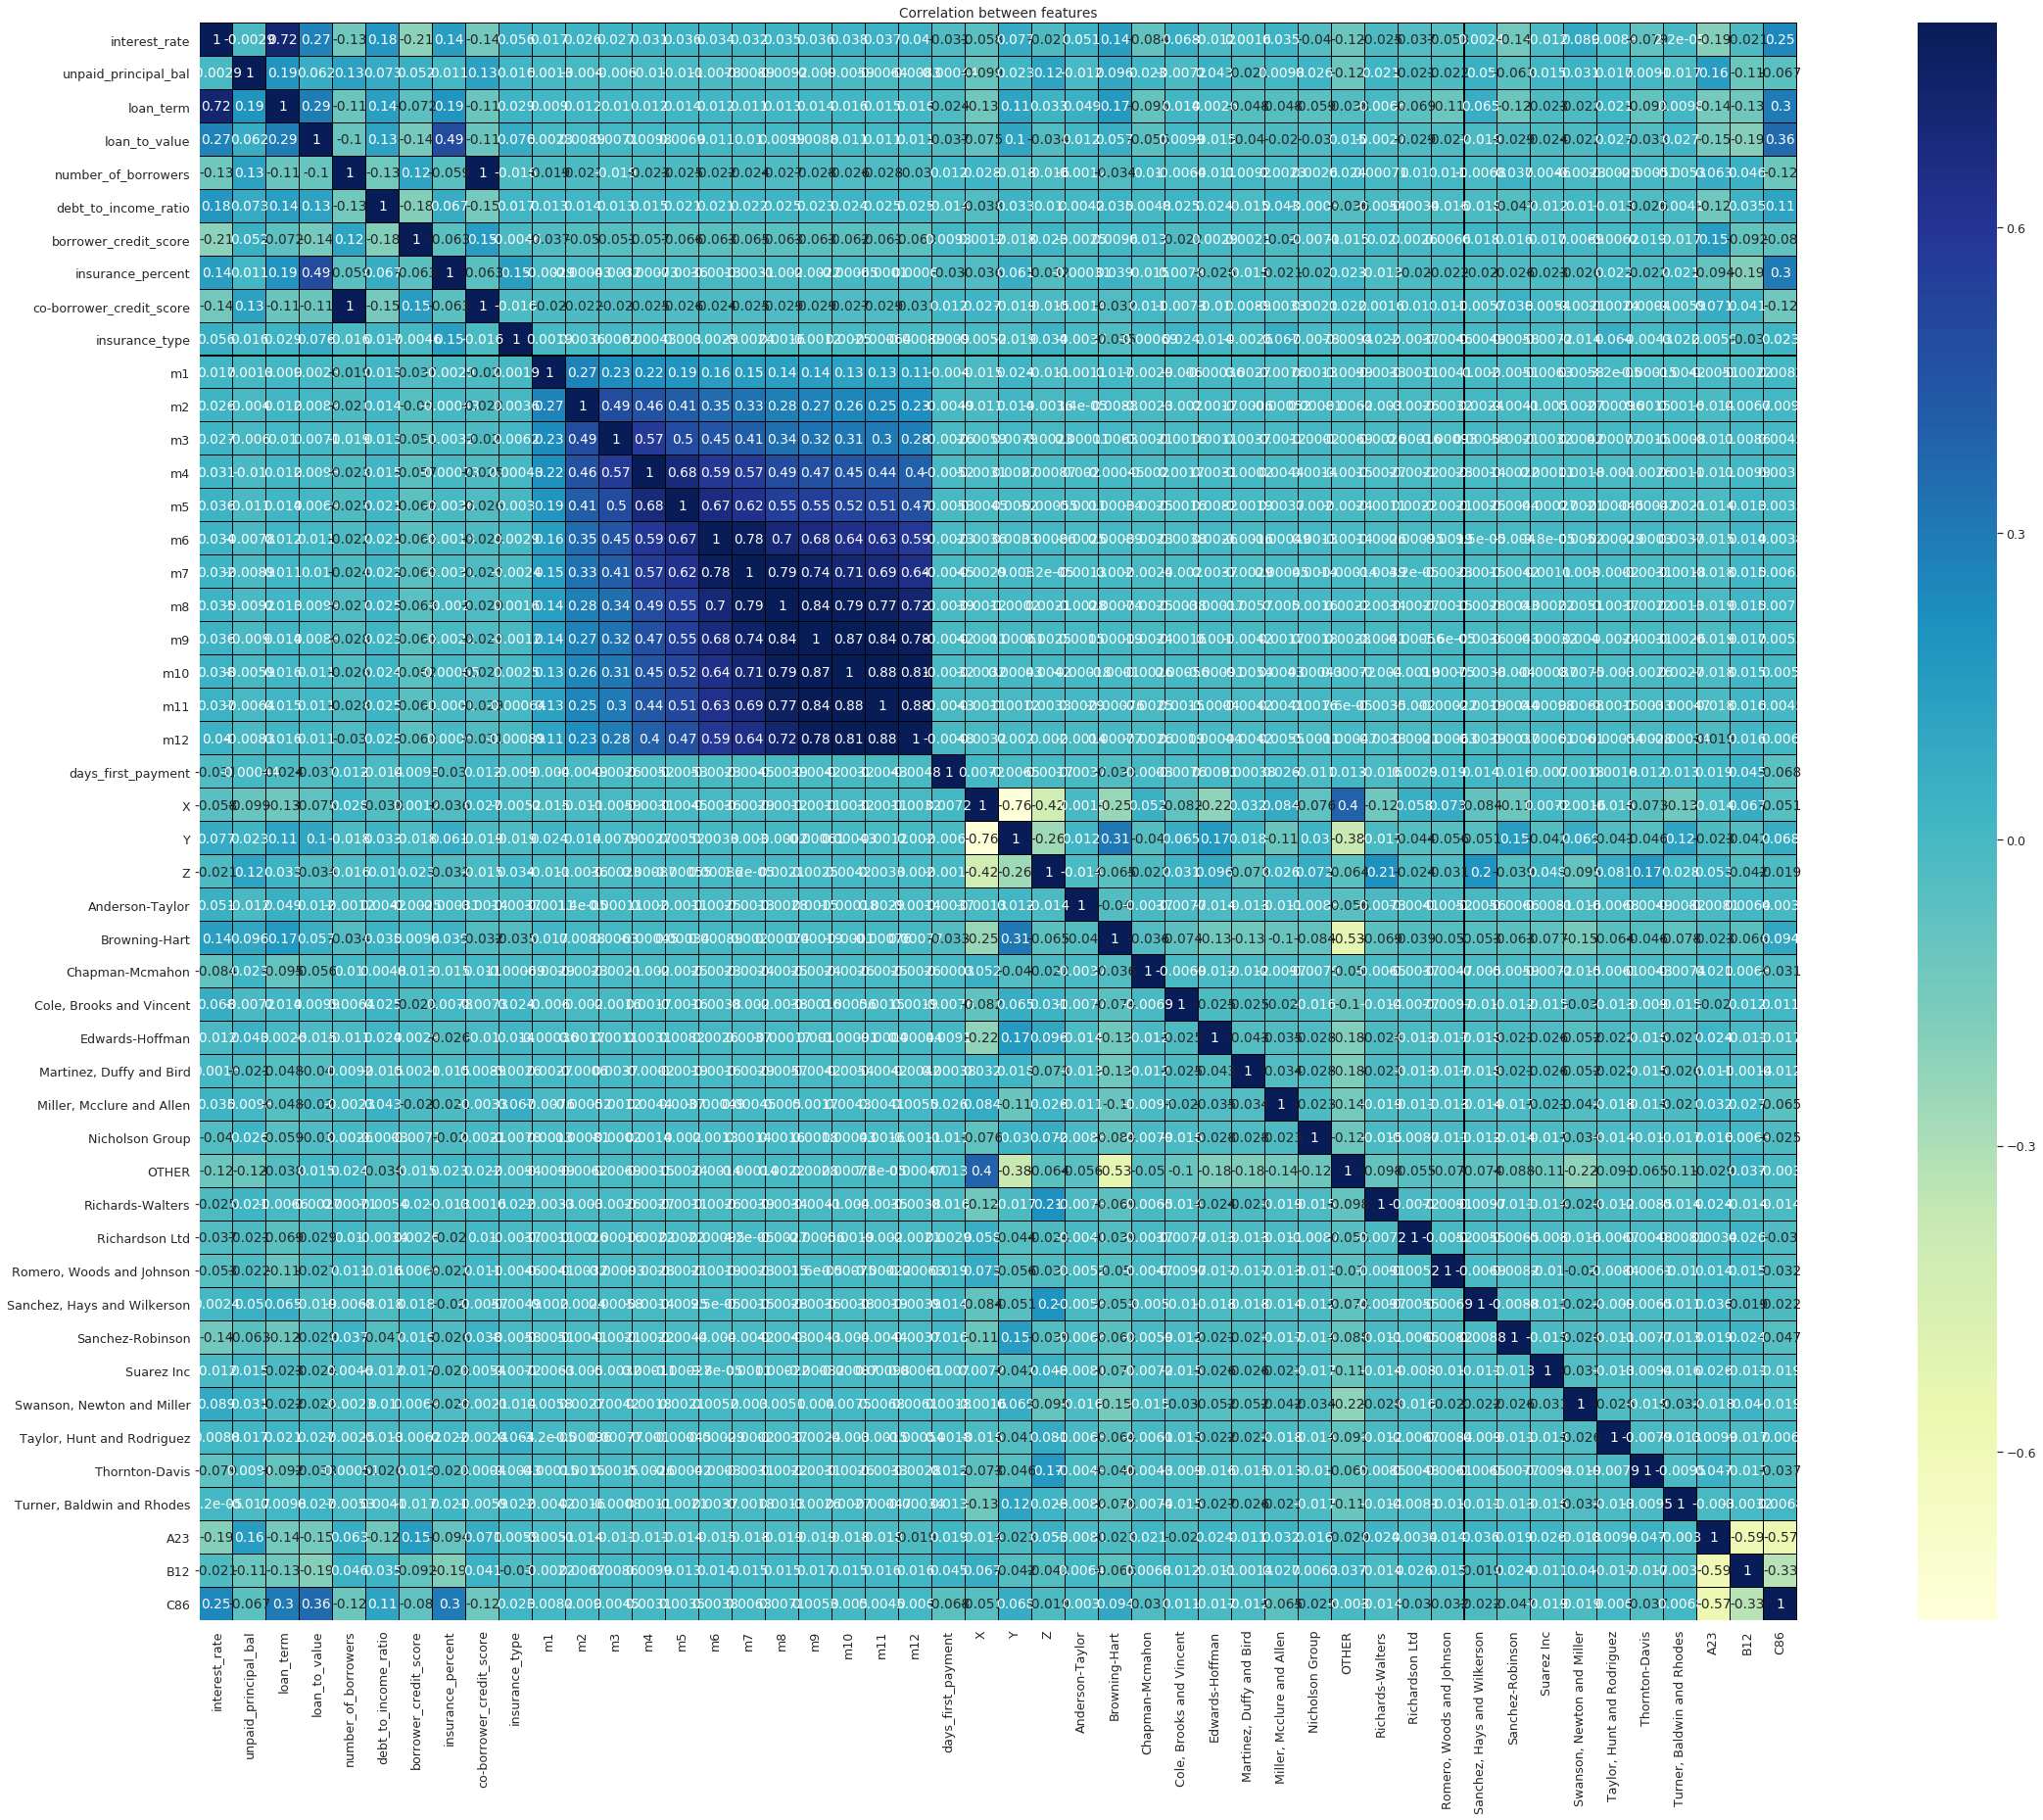

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr=x.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(44, 30))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')

In [0]:
cols_high_corr = ['co-borrower_credit_score']
x = data.drop(cols_high_corr,axis=1)
x = x.drop(['m13'],axis=1)
test2 = test.drop(cols_high_corr,axis=1)

In [0]:
len(x.columns)

47

In [0]:
len(test2.columns)

47

In [0]:
st = MinMaxScaler()
st.fit(x)
cols_data = x.columns
cols_test = test2.columns
data = pd.DataFrame(st.transform(x))
test2 = pd.DataFrame(st.transform(test2))
data.columns = cols_data
test2.columns = cols_test

In [0]:
data.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,days_first_payment,X,Y,Z,Anderson-Taylor,Browning-Hart,Chapman-Mcmahon,"Cole, Brooks and Vincent",Edwards-Hoffman,"Martinez, Duffy and Bird","Miller, Mcclure and Allen",Nicholson Group,OTHER,Richards-Walters,Richardson Ltd,"Romero, Woods and Johnson","Sanchez, Hays and Wilkerson",Sanchez-Robinson,Suarez Inc,"Swanson, Newton and Miller","Taylor, Hunt and Rodriguez",Thornton-Davis,"Turner, Baldwin and Rhodes",A23,B12,C86
0,0.444444,0.170732,1.0,0.978022,0.0,0.333333,0.826190,0.75,0.0,0.0,0.00,0.0,0.0,0.000000,0.000,0.111111,0.0,0.000000,0.000000,0.000000,0.000000,0.516129,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.583333,0.111859,1.0,0.725275,0.0,0.682540,0.829762,0.00,0.0,0.0,0.00,0.0,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.076923,0.000000,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.222222,0.298570,0.4,0.472527,0.0,0.507937,0.928571,0.00,0.0,0.0,0.00,0.0,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.555556,0.104289,1.0,0.439560,1.0,0.682540,0.753571,0.00,0.0,0.0,0.00,0.0,0.0,0.000000,0.000,0.000000,0.0,0.090909,0.083333,0.076923,0.071429,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.555556,0.095038,1.0,0.813187,0.0,0.666667,0.810714,0.00,0.0,0.0,0.25,0.4,0.5,0.571429,0.625,0.666667,0.7,0.727273,0.750000,0.769231,0.785714,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## forming test and train

In [0]:
from imblearn.over_sampling import SMOTE

# x_s, y_s = SMOTE(sampling_strategy="not majority", random_state=2,
#                                 k_neighbors=5).fit_resample(x, y)
x_s,y_s = x,y

In [0]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder()
onehot.fit(y_s.reshape(-1,1))
y_s=onehot.transform(y_s.reshape(-1,1))
y_s=y_s.toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
len(y_s)

116058

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_s,y_s,test_size  = 0.35,random_state = 2)

In [0]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [0]:
import tensorflow as tf
%matplotlib inline

In [0]:
x_train.shape

(75437, 47)

In [0]:
x.shape

(116058, 47)

In [0]:
from sklearn.metrics import roc_auc_score

In [0]:

x_ph = tf.placeholder(tf.float32, shape=[None, 47]) 
    
y_ph = tf.placeholder(tf.float32, shape=[None, 2])

In [0]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [0]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 1, 2, 1],
                        strides=[1, 1, 2, 1], padding='SAME')

In [0]:
# originally an image is simply a flat array of 784 numbers representing pixels
# we are reshaping it to original dimension of 28x28X1 , had this been a colored image. 
# there will be 3 channels instead of just 1 on the third dimension
x_image = tf.reshape(x_ph, [-1, 1, 47, 1])

In [0]:
W_conv1 = weight_variable([1, 5, 1, 32])
b_conv1 = bias_variable([32])

In [0]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [0]:
W_conv2 = weight_variable([1, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [0]:
h_pool2_flat = tf.reshape(h_pool2, [-1, 1*12*64])

W_fc1 = weight_variable([1*12*64, 1024])
b_fc1 = bias_variable([1024])

h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [0]:
keep_prob = tf.placeholder(tf.float32)

h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W0820 03:57:35.485426 140146622416768 deprecation.py:506] From <ipython-input-47-1028829bc7f6>:3: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
W_fc2 = weight_variable([1024, 200])
b_fc2 = bias_variable([200])

h_fc2= tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
h_fc2_drop=tf.nn.dropout(h_fc2,keep_prob)


In [0]:
W_fc3 = weight_variable([200, 2])
b_fc3 = bias_variable([2])

y_conv_logits=tf.matmul(h_fc2_drop, W_fc3) + b_fc3

In [0]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_ph,logits=y_conv_logits))

train_step = tf.train.AdamOptimizer().minimize(loss)

correct_prediction = tf.equal(tf.argmax(y_conv_logits, 1),tf.argmax(y_ph, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

test_labels_predicted=tf.argmax(y_conv_logits, 1)
prediction=tf.nn.softmax(y_conv_logits)

In [0]:
from sklearn.metrics import f1_score

In [0]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(200):
        rand_int=np.random.choice(range(75437),100)
#         print(rand_int)
#         print(x_train)
        x_train_batch=x_train.iloc[rand_int,:]
#         print (x_train_batch)
        y_train_batch=y_train[rand_int]
        
        if i % 10 == 0:
#             train_accuracy = accuracy.eval(feed_dict={x_ph: x_train_batch, y_ph: y_train_batch, keep_prob: 1.0})
#             test_accuracy=accuracy.eval(feed_dict={x_ph: x_test, y_ph: y_test, keep_prob: 1.0})
#             print('step %d, training accuracy %g & testing accuracy %g' % (i, train_accuracy,test_accuracy))
            
            pred_train = sess.run(test_labels_predicted,feed_dict={x_ph: x_train_batch, y_ph: y_train_batch, keep_prob: 1.0})
            p_train=pred_train
            auc_train = f1_score(y_train_batch[:,1],p_train)
            
            pred_test = sess.run(test_labels_predicted,feed_dict={x_ph:x_test,keep_prob:1.0})
            p_test=pred_test
            auc_test = f1_score(y_test[:,1],p_test)
            print('step %d, training f1 %g & testing f1 %g' % (i, auc_train,auc_test))
            
        train_step.run(feed_dict={x_ph: x_train_batch, y_ph: y_train_batch, keep_prob: 0.5})

    print('test accuracy %g' % accuracy.eval(feed_dict={x_ph: x_test, y_ph: y_test, keep_prob: 1.0}))
    
    test_labels_predicted=sess.run(test_labels_predicted,feed_dict={x_ph:test2,keep_prob:1.0})

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


step 0, training f1 0 & testing f1 0.0113578


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


step 10, training f1 0 & testing f1 0
step 20, training f1 0 & testing f1 0
step 30, training f1 0 & testing f1 0
step 40, training f1 0 & testing f1 0
step 50, training f1 0 & testing f1 0
step 60, training f1 0 & testing f1 0
step 70, training f1 0 & testing f1 0
step 80, training f1 0 & testing f1 0
step 90, training f1 0 & testing f1 0
step 100, training f1 0 & testing f1 0
step 110, training f1 0 & testing f1 0
step 120, training f1 0 & testing f1 0
step 130, training f1 0 & testing f1 0
step 140, training f1 0 & testing f1 0
step 150, training f1 0 & testing f1 0
step 160, training f1 0 & testing f1 0
step 170, training f1 0 & testing f1 0
step 180, training f1 0 & testing f1 0
step 190, training f1 0 & testing f1 0
test accuracy 0.994289


In [0]:
test_labels_predicted.sum()

0

In [0]:
len(test_labels_predicted)

In [0]:
pd.DataFrame(test_labels_predicted).to_csv('cnn.csv',index=False)

In [0]:
x_ph = tf.placeholder(tf.float32, shape=[None, 47]) 
y_ph = tf.placeholder(tf.float32, shape=[None, 2])

In [0]:
W1 = tf.Variable(tf.truncated_normal([47, 30], stddev=0.1))
W2 = tf.Variable(tf.truncated_normal([30, 20], stddev=1.0))
W3 = tf.Variable(tf.truncated_normal([20, 10], stddev=1.0))
W4 = tf.Variable(tf.truncated_normal([10, 5], stddev=1.0))
W5 = tf.Variable(tf.truncated_normal([5, 2], stddev=1.0))

b1 = tf.Variable(tf.zeros([30]))
b2 = tf.Variable(tf.zeros([20]))
b3 = tf.Variable(tf.zeros([10]))
b4 = tf.Variable(tf.zeros([5]))
b5 = tf.Variable(tf.zeros([2]))

In [0]:
y1 = tf.nn.relu(tf.matmul(x_ph, W1) + b1)
y2 = tf.nn.tanh(tf.matmul(y1,W2) + b2)
y3 = tf.nn.tanh(tf.matmul(y2,W3) + b3)
y4 = tf.nn.tanh(tf.matmul(y3,W4) + b4)
logits= tf.matmul(y4,W5) + b5   # should not apply any activation function for the output layer because 
                                #"tf.nn.softmax_cross_entropy_with_logits_v2" will apply logit function automatically

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y_ph)

loss=tf.reduce_mean(cross_entropy)

train_op = tf.train.AdamOptimizer(.01).minimize(loss)
test_labels_predicted=tf.argmax(logits, 1)
prediction=tf.nn.softmax(logits)

In [0]:
epochs=5
batch_size=1000
num_batches=int(x_train.shape[0]/batch_size)

In [0]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for j in range(epochs):
        
        for i in range(num_batches):
            
            rand_ind=np.random.choice(range(x_train.shape[0]),1000,replace=False)
            
            x_batch=x_train.iloc[rand_ind,:]
            y_batch=y_train[rand_ind]
            
            sess.run(train_op,feed_dict={x_ph:x_batch,y_ph:y_batch})
            
            if i%50==0:
                print(j,i)
    test_prediction=sess.run(test_labels_predicted,feed_dict={x_ph:test2})

0 0
0 50
1 0
1 50
2 0
2 50
3 0
3 50
4 0
4 50


In [0]:
test_prediction.sum()

5279

In [0]:
p=test_prediction[:,1]
# roc_auc_score(y_test[:,1],p)

In [0]:
test_prediction

array([0, 0, 0, ..., 0, 1, 0])

In [0]:
pd.DataFrame(test_prediction).to_csv('FFNN.csv',index=False)

In [0]:
from google.colab import files
pd.DataFrame(test_prediction).to_csv('FFNN.csv',index=False)
files.download('FFNN.csv')

In [82]:
from imblearn.over_sampling import SMOTE

x_s, y_s = SMOTE(sampling_strategy="not majority", random_state=2,
                                k_neighbors=5).fit_resample(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
y_s

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_s,y_s,test_size  = 0.35,random_state = 2)

In [85]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
nb_pred=naive_bayes.predict(x_test)

In [0]:
from sklearn.metrics import f1_score
f1_score(nb_pred,y_test)

In [0]:
nb_test = naive_bayes.predict(test2)

In [0]:
nb_test.sum()


In [0]:
pd.DataFrame(nb_test).to_csv('Naive_bayes.csv')

In [0]:
from sklearn.svm import SVC

In [0]:
kernel = 'linear'

In [0]:
clf = SVC(kernel=kernel).fit(x_train, y_train)

In [0]:
predicted = clf.predict(x_test)
f1_score(predicted,y_test)

In [98]:
import xgboost as xgb

eval_set = [(x_test, y_test)]

model_xgbs = xgb.XGBClassifier(learning_rate=0.1, 
                          max_depth=12,
                          nthread=4,
                          n_estimators=1000,
                          objective="binary:logistic")

model_xgbs.silent=False

model_xgbs.fit(x_train,y_train, early_stopping_rounds=10, 
          eval_set=eval_set,
          verbose=True,
          eval_metric='logloss') #https://xgboost.readthedocs.io/en/latest/parameter.html

# predicting the test set results
y_pred = model_xgbs.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model_xgbs.score(x_train, y_train))
print("Testing accuracy :", model_xgbs.score(x_test, y_test))

# classification report
# print(classification_report(y_test, y_pred))

# # confusion matrix 
# print(confusion_matrix(y_test, y_pred))

[0]	validation_0-logloss:0.603759
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.531198
[2]	validation_0-logloss:0.468592
[3]	validation_0-logloss:0.41512
[4]	validation_0-logloss:0.369519
[5]	validation_0-logloss:0.329704
[6]	validation_0-logloss:0.295127
[7]	validation_0-logloss:0.264725
[8]	validation_0-logloss:0.237958
[9]	validation_0-logloss:0.214273
[10]	validation_0-logloss:0.19377
[11]	validation_0-logloss:0.175234
[12]	validation_0-logloss:0.158576
[13]	validation_0-logloss:0.143873
[14]	validation_0-logloss:0.130678
[15]	validation_0-logloss:0.118885
[16]	validation_0-logloss:0.108397
[17]	validation_0-logloss:0.098893
[18]	validation_0-logloss:0.090542
[19]	validation_0-logloss:0.082779
[20]	validation_0-logloss:0.075808
[21]	validation_0-logloss:0.069548
[22]	validation_0-logloss:0.063883
[23]	validation_0-logloss:0.058791
[24]	validation_0-logloss:0.054188
[25]	validation_0-logloss:0.050202
[26]	validation_0-logloss:0.046463

In [99]:
f1_score(y_pred,y_test)

0.9979455445544555

In [100]:
import numpy as np
y_pred_tst = model_xgbs.predict(test2.as_matrix())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [101]:
y_pred_tst

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
y_pred_tst.sum()

228

In [0]:
pd.DataFrame(y_pred_tst).to_csv('XGB.csv')
files.download('XGB.csv')


In [0]:
#Model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
GBC = GradientBoostingClassifier()

dt_param_grid = {"max_depth": [6, 8, 10],
                 "max_features": [ 2, 5, 8],
                 "min_samples_split": [3, 4, 5],
                 "min_samples_leaf": [3, 4, 5]}

#fiting the model
gsGBC = GridSearchCV(GBC,param_grid = dt_param_grid, cv=3, 
                     scoring="f1", n_jobs= 20,verbose=True)
gsGBC.fit(x_train,y_train)
GBC_best = gsGBC.best_estimator_

#prediction
y_pred = gsGBC.predict(x_test)
f1_score(y_pred,y_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest hyperparameter tuning. 
RFC = RandomForestClassifier()

# Define parameter grid.
rf_param_grid = {"max_depth": [8,10,11],
                 "max_features": ["sqrt", 2, 5],
                 "min_samples_split": [2,3, 4],
                 "min_samples_leaf": [5, 8,9],
                 "bootstrap": [False],
                 "n_estimators" :[50],
                 "criterion": ["gini"],
#                  "class_weight": ['balanced']
                }
                
# Search grid and store best estimator.
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=4, scoring="f1", n_jobs= 3,verbose=True)
gsRFC.fit(x_train,y_train)
RFC_best = gsRFC.best_estimator_

# Print best score.
print('Best score: {}'.format(gsRFC.best_score_))
print('Best parameters: {}'.format(gsRFC.best_params_))

In [0]:
y_train

In [0]:
y_pred = gsRFC.predict(x_test)

In [0]:
f1_score(y_pred,y_test)

In [0]:
y_pred_test = model_rf.predict(test2)

In [0]:
y_pred_test.sum()

In [0]:
pd.DataFrame(y_pred_test).to_csv('RF.csv')